<a href="https://colab.research.google.com/github/Ricardosp88/Aprendizaje_No_supervisado/blob/master/Spectral_and_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

(150, 4)


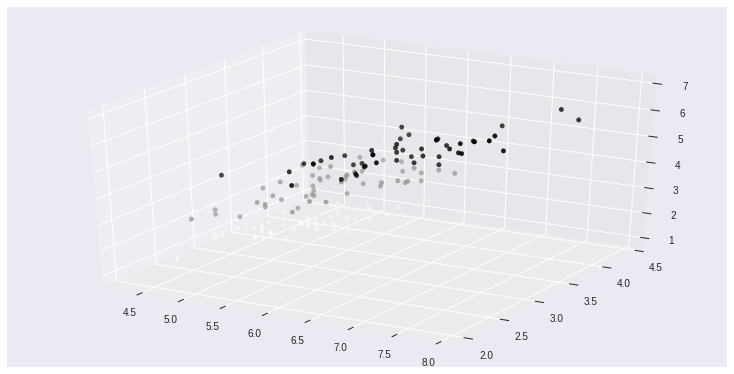

In [10]:
iris = datasets.load_iris()
Dx = iris.data[:, :3]  # we only take the first three features.
Dy = iris.target
print(iris.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)

In [0]:
from sklearn.cluster import SpectralClustering

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


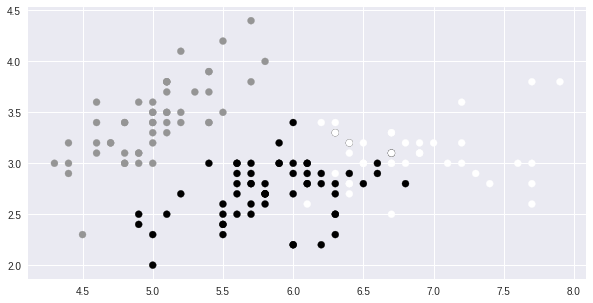

In [29]:
K=3
knn = 5
clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)

fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(Dx[:,0], Dx[:,1], c=clustering.labels_)
#ax.scatter(Dx[:,0], Dx[:,1], Dy)

In [62]:
def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j]
                                          )) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)
  
def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))
  
def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([totales[k]
                   * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])
  
def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)
      
def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign

mC = matriz_confusion(Dy,clustering.labels_)

print(mC)
print('El valor del error cometido es = ', medida_error(mC))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC),)
print('El valor F1 es = ', medida_f1(mC))

[[46  2  2]
 [50  0  0]
 [48  0  2]]
El valor del error cometido es =  0.040000000000000036
La pureza del agrupamiento obtenido es =  0.35999999999999993
El valor F1 es =  0.4948453608247422


In [77]:
error=1
F1=0

for knn in range (1,15):
  K=3
  
  clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)
  
  mC = matriz_confusion(Dy,clustering.labels_)
  medida_error(mC)
  
  if  medida_f1(mC)>F1: # medida_error(mC)<error:
    Vecinos=knn
    error=medida_error(mC)
    F1=medida_f1(mC)
    

knn=Vecinos    
clustering = SpectralClustering(n_clusters = K, 
                                affinity = 'nearest_neighbors', n_neighbors = knn,
                                random_state = 0).fit(Dx)
print(knn)
mC = matriz_confusion(Dy,clustering.labels_)

print(mC)
print('El valor del error cometido es = ', medida_error(mC))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC), )
print('El valor F1 es = ', medida_f1(mC))

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklea

4
[[ 0  0 50]
 [ 1 49  0]
 [36 14  0]]
El valor del error cometido es =  0.09999999999999998
La pureza del agrupamiento obtenido es =  0.8999999999999999
El valor F1 es =  0.8982809480215644


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [0]:
from sklearn.cluster import DBSCAN

eps=0.7
M=10

clustering = DBSCAN(eps=eps, min_samples=M).fit(Dx)


In [85]:
error=1
F1=0

for M in range(3,20):
  for i in np.arange(0.3, 0.8, 0.05):
  
    clustering = DBSCAN(eps=eps, min_samples=M).fit(Dx)
    mC = matriz_confusion(Dy,clustering.labels_)
    
    if  medida_f1(mC)>F1: # medida_error(mC)<error:
      MejorM=M
      mejorEps=eps
      error=medida_error(mC)
      F1=medida_f1(mC)
  

eps=mejorEps
M=MejorM


clustering = DBSCAN(eps=eps, min_samples=M).fit(Dx)

mC = matriz_confusion(Dy,clustering.labels_)

print(mC)
print('El valor del error cometido es = ', medida_error(mC))
print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC), )
print('El valor F1 es = ', medida_f1(mC))  

[[ 0 50  0]
 [ 0  0 50]
 [ 2  0 48]]
El valor del error cometido es =  0.013333333333333308
La pureza del agrupamiento obtenido es =  0.6799999999999999
El valor F1 es =  0.7747747747747749
